# 决策树重点

找到纯度更高的分类点，作为各个节点（包括根节点和中间非叶子节点）。如何才能度量纯度？为此提出了基尼系数、信息熵的算法。

> 你可以把决策树的构造过程理解成为寻找纯净划分的过程。数学上，我们可以用纯度来表示，纯度换一种方式来解释就是让目标变量的分歧最小

> 基尼系数本身反映了样本的不确定性——当基尼系数越小的时候，说明样本之间的差异性小，不确定程度低。而分类的过程本身就是一个不确定程度降低的过程，即纯度提升的过程。所以CART算法在构造分类树的时候，会选择基尼系数最小的属性作为分类的划分。

ID3：以信息增益作为判断标准，计算每个特征的信息增益，选取信息增益最大的特征，但是容易选取到取值较多的特征

C4.5：以信息增益比作为判断标准，计算每个特征的信息增益比，选取信息增益比最大的特征

CART：
*  分类树以基尼系数为标准，选取基尼系数小的的特征

* 回归树以均方误差或绝对值误差为标准，选取均方误差或绝对值误差最小的特征

# 直接构造决策树

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.datasets import load_iris

In [2]:
X, y = load_iris(as_frame=True,return_X_y=True)

iris_df = X.copy()  
iris_df['species'] = y  
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris_df.species.value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
import sklearn.tree as tree 
dtree = tree.DecisionTreeClassifier()
dtree.fit(X,y)



DecisionTreeClassifier()

In [6]:
import graphviz 
dot_data = tree.export_graphviz(dtree,out_file=None,
                               feature_names=X.columns,
                               filled=True,
                               rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('iris_tree')

'iris_tree.pdf'

# 带有测试集的决策树构造

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris 

iris = load_iris()  
features = iris.data 
target = iris.target 

# 划分训练集和测试集 
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.33,random_state=0)

# 创建cart决策树
dtree = DecisionTreeClassifier() 
dtree.fit(X_train,y_train)

# 预测
y_pred = dtree.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test,y_pred)
print(f"模型准确率：{accuracy:.4f}")



模型准确率：0.9600


# CART回归树

> 在cart分类树中采用的是基尼系数作为标准，那么在cart回归树中，如何评价不纯度呢？实际上我们要根据样本的混乱程度，也就是样本的离散程度来评价不纯度——最小绝对偏差、最小二乘偏差

In [8]:
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

df = pd.read_csv('boston_house_prices.csv')

print(df.columns)
features = df.copy()
features = features.drop(columns=['MEDV'])
target = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.33,random_state=0)

dtree = DecisionTreeRegressor() 
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print(f"r2_score: {r2_score(y_test,y_pred):.4f}")
print(f"回归树二乘偏差均值: {mean_absolute_error(y_test,y_pred):.4f}")
print(f"回归树绝对值偏差均值: {mean_squared_error(y_test,y_pred):.4f}")



Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
r2_score: 0.6569
回归树二乘偏差均值: 3.2665
回归树绝对值偏差均值: 27.6579


# 泰坦尼克乘客生存预测

## 数据加载

In [39]:
import pandas as pd 

train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

# 数据探索
print(train_df.info())
print('-'*30)
print(train_df.describe())
print('-'*30)
print(train_df.describe(include=['O']))
print('-'*30)
print(train_df.head())
print('-'*30)
print(train_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
------------------------------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008  

## 数据探索

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


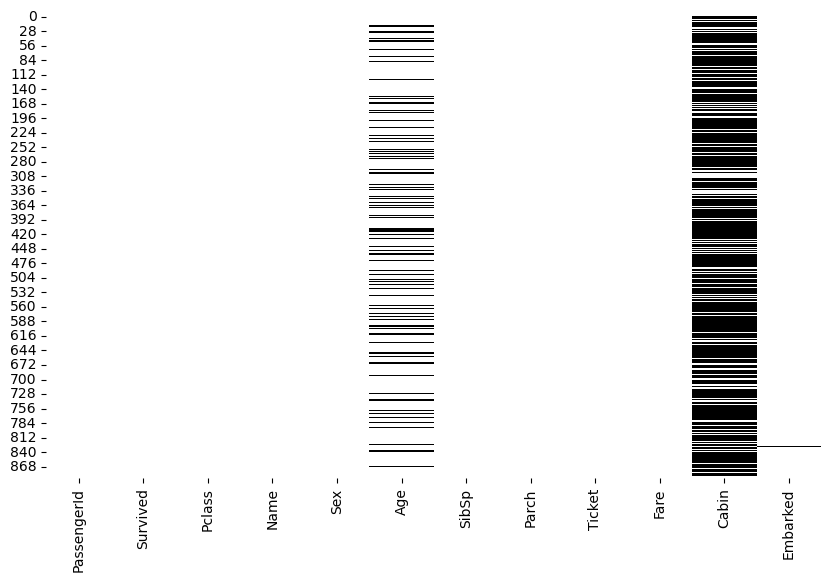

In [40]:
## 数据探索

import matplotlib.pyplot as plt 
import seaborn as sns 

train_is_nan = train_df.isna()

print(train_is_nan.sum())
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(train_is_nan, cbar=False, cmap='gray_r', ax=ax)
plt.show()

train_data = train_df.copy()
test_data = test_df.copy()

In [41]:
# 数据清洗

# 用平均值补充年龄和船票价格信息
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean()) 
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())  

train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean())  
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())   


In [42]:
print(train_data['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [43]:
# 使用登录最多的港口来填充登录港口的nan值
train_data['Embarked'] = train_data['Embarked'].fillna('S')
test_data['Embarked'] = test_data['Embarked'].fillna('S')

## 特征选择
PassengerId 为乘客编号，对分类没有作用，可以放弃；

Name 为乘客姓名，对分类没有作用，可以放弃；

Cabin 字段缺失值太多，可以放弃；

Ticket 字段为船票号码，杂乱无章且无规律，可以放弃。
其余的字段包括：Pclass、Sex、Age、SibSp、Parch 和 Fare，这些属性分别表示了乘客的船票等级、性别、年龄、亲戚数量以及船票价格，可能会和乘客的生存预测分类有关系。

具体是什么关系，我们可以交给分类器来处理

In [44]:
# 特征选择
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
train_labels = train_data['Survived']
test_features = test_data[features]

In [45]:
# sex和 embarked 是类别型数据，需要进行编码
from sklearn.feature_extraction import DictVectorizer
dvec=DictVectorizer(sparse=False)
train_features=dvec.fit_transform(train_features.to_dict(orient='records'))

print(dvec.feature_names_)



['Age', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp']


## 决策树模型

In [47]:
from sklearn.tree import DecisionTreeClassifier
# 构造ID3决策树
clf = DecisionTreeClassifier(criterion='entropy')
# 决策树训练
clf.fit(train_features, train_labels)

DecisionTreeClassifier(criterion='entropy')

## 预测评估

In [48]:
# 得到决策树准确率
acc_decision_tree = round(clf.score(train_features, train_labels), 6)
print(u'score准确率为 %.4lf' % acc_decision_tree)

score准确率为 0.9820


In [ ]:
test_features=dvec.transform(test_features.to_dict(orient='records'))
# 决策树预测
pred_labels = clf.predict(test_features)